In [42]:
import sys, pathlib, ssl
import numpy as np, pandas as pd

from RuleCard import RuleCardClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, brier_score_loss, log_loss
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

clf = RuleCardClassifier(
    min_support=0.01,
    max_rules=30,
    PDO=50, score0=100, odds0=50,
    max_depth=2, selection='greedy', n_stages=40, random_state=42,
    calibrate=True, calibrator__n_splits=3
).fit(X, y)

print("Training info:", clf.training_info_)
print("\nRules table (head):")
print(clf.rules_table().head())

# Predictions
proba = clf.predict_proba(X)[:5, 1]
pred = clf.predict(X)[:10]
score = clf.predict_scores(X)[:5]
print("\nSample proba:", proba)
print("Sample pred:", pred)
print("Sample score:", score)
print("Accuracy:", accuracy_score(y[:10], pred))
print("AUC:", roc_auc_score(y, clf.predict_proba(X)[:, 1]))
print("Brier:", brier_score_loss(y, clf.predict_proba(X)[:, 1]))
print("Log-loss:", log_loss(y, clf.predict_proba(X)[:, 1]))


Training info: {'n_samples': 569, 'n_features': 30, 'class_balance': 0.6274165202108963, 'fit_time_s': 5.869767904281616, 'n_rules': 30}

Rules table (head):
   stage  kind                              features  \
0      0  pair  (worst concave points, worst radius)   
1      0  pair  (worst concave points, worst radius)   
2      1   uni                    (worst perimeter,)   
3      1   uni                    (worst perimeter,)   
4      2   uni                         (worst area,)   

                                              bounds  \
0  {'worst radius': {'lb': -inf, 'ub': 16.7950000...   
1  {'worst radius': {'lb': 16.795000076293945, 'u...   
2  {'worst perimeter': {'lb': -inf, 'ub': 91.6949...   
3  {'worst perimeter': {'lb': 116.04999923706055,...   
4         {'worst area': {'lb': -inf, 'ub': 698.75}}   

                                                expr    weight  support  \
0  worst radius <= 16.795000076294 AND worst conc...  0.345622      333   
1  worst radius > 

In [43]:
clf.scorecard_.rules_table()

,stage,kind,features,bounds,expr,weight,support,pos_rate,lr,weight_eff,points
0,0,pair,"(worst concave points, worst radius)","{'worst radius': {'lb': -inf, 'ub': 16.7950000...",worst radius <= 16.795000076294 AND worst conc...,0.345622,333,0.984985,1.0,0.345622,25
1,0,pair,"(worst concave points, worst radius)","{'worst radius': {'lb': 16.795000076293945, 'u...",worst radius > 16.795000076294 AND worst conca...,-0.626953,152,0.000000,1.0,-0.626953,-45
2,1,uni,"(worst perimeter,)","{'worst perimeter': {'lb': -inf, 'ub': 91.6949...",worst perimeter <= 91.694999694824,0.286055,233,0.991416,1.0,0.286055,21
3,1,uni,"(worst perimeter,)","{'worst perimeter': {'lb': 116.04999923706055,...",worst perimeter > 116.049999237061,-0.471612,170,0.017647,1.0,-0.471612,-34
4,2,uni,"(worst area,)","{'worst area': {'lb': -inf, 'ub': 698.75}}",worst area <= 698.750000000000,0.215118,293,0.976109,1.0,0.215118,16
5,2,uni,"(worst area,)","{'worst area': {'lb': 953.7000122070312, 'ub':...",worst area > 953.700012207031,-0.360209,164,0.018293,1.0,-0.360209,-26
6,3,uni,"(mean concave points,)","{'mean concave points': {'lb': -inf, 'ub': 0.0...",mean concave points <= 0.026804999448,0.203295,215,0.990698,1.0,0.203295,15
7,3,uni,"(mean concave points,)",{'mean concave points': {'lb': 0.0633350014686...,mean concave points > 0.063335001469,-0.284313,173,0.063584,1.0,-0.284313,-21
8,4,uni,"(mean concavity,)","{'mean concavity': {'lb': -inf, 'ub': 0.072264...",mean concavity <= 0.072264999151,0.145700,314,0.949045,1.0,0.145700,11
9,4,uni,"(mean concavity,)","{'mean concavity': {'lb': 0.11919999867677689,...",mean concavity > 0.119199998677,-0.233004,155,0.077419,1.0,-0.233004,-17


In [44]:
viz = clf.visualizer()
viz.global_table()

,stage,kind,expr,points,weight,support,pos_rate
0,0,pair,worst radius <= 16.795000076294 AND worst conc...,25,0.345622,333,0.984985
1,0,pair,worst radius > 16.795000076294 AND worst conca...,-45,-0.626953,152,0.000000
2,1,uni,worst perimeter <= 91.694999694824,21,0.286055,233,0.991416
3,1,uni,worst perimeter > 116.049999237061,-34,-0.471612,170,0.017647
4,2,uni,worst area <= 698.750000000000,16,0.215118,293,0.976109
5,2,uni,worst area > 953.700012207031,-26,-0.360209,164,0.018293
6,3,uni,mean concave points <= 0.026804999448,15,0.203295,215,0.990698
7,3,uni,mean concave points > 0.063335001469,-21,-0.284313,173,0.063584
8,4,uni,mean concavity <= 0.072264999151,11,0.145700,314,0.949045
9,4,uni,mean concavity > 0.119199998677,-17,-0.233004,155,0.077419


In [45]:
local = viz.local_table(x=X.iloc[2:3])
print("SCORE: ", local[1])
print("PROBA: ", local[2])
local[0].head()

SCORE:  -370
PROBA:  [0.93109038 0.06890962]


,stage,kind,expr,points,features,bounds,weight,support,pos_rate
0,-1,[BASE],[BASE],-145,None,None,NaN,NaN,NaN
1,0,pair,worst radius > 16.795000076294 AND worst conca...,-45,"(worst concave points, worst radius)","{'worst radius': {'lb': 16.795000076293945, 'u...",-0.626953,152.0,0.000000
2,1,uni,worst perimeter > 116.049999237061,-34,"(worst perimeter,)","{'worst perimeter': {'lb': 116.04999923706055,...",-0.471612,170.0,0.017647
3,2,uni,worst area > 953.700012207031,-26,"(worst area,)","{'worst area': {'lb': 953.7000122070312, 'ub':...",-0.360209,164.0,0.018293
4,3,uni,mean concave points > 0.063335001469,-21,"(mean concave points,)",{'mean concave points': {'lb': 0.0633350014686...,-0.284313,173.0,0.063584


In [46]:
viz.render(
    mode='global',
    title="Global Scorecard",
    savepath='test_global_scorecard.png'
)

'test_global_scorecard.png'

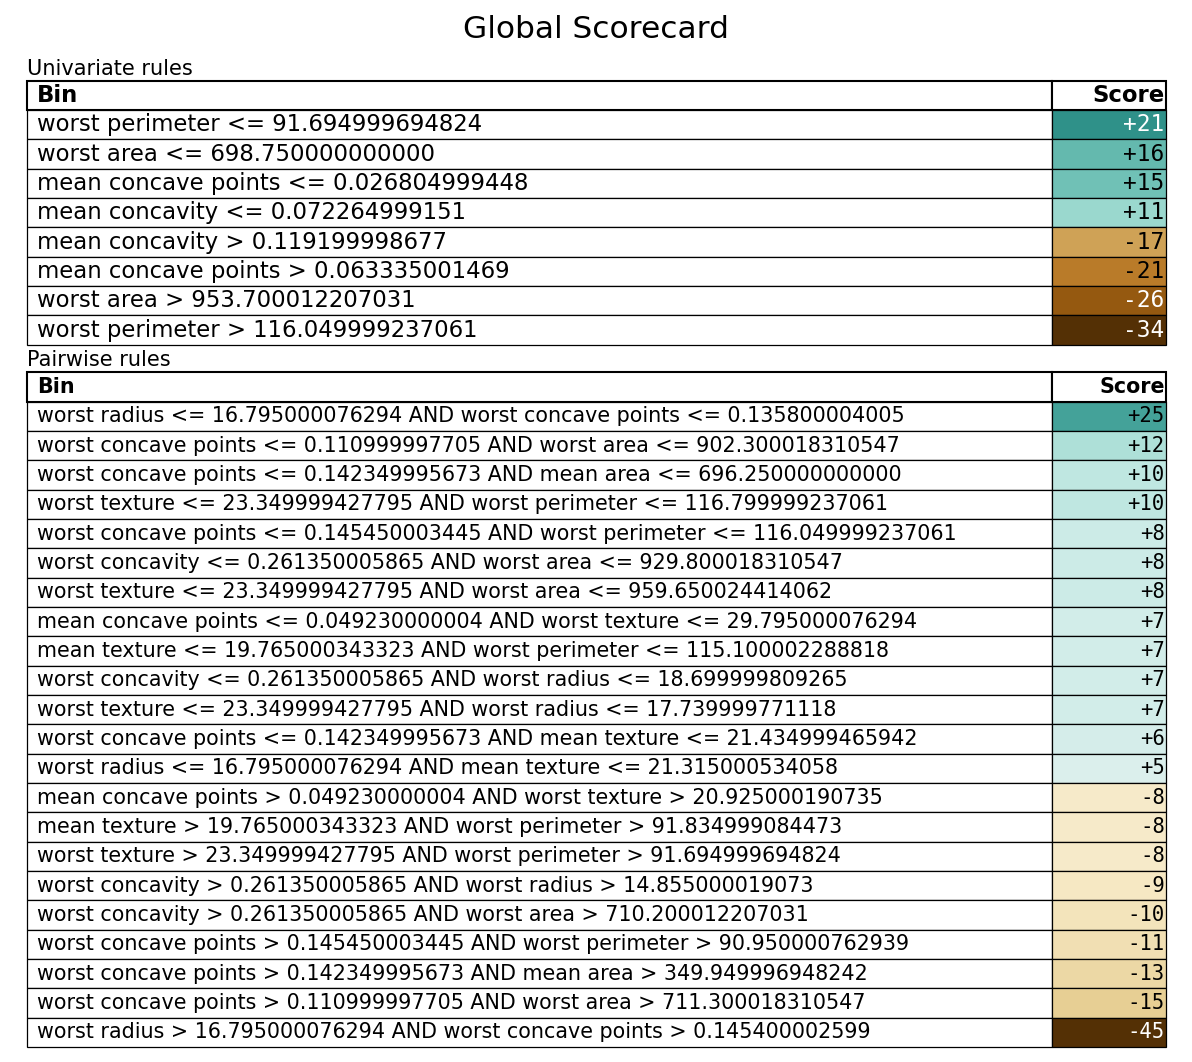

In [47]:
# show the png file
from IPython.display import Image
Image('test_global_scorecard.png', width=600)